<a href="https://colab.research.google.com/github/epadam/Machine-Learning-Tutorial-Demo-Resources/blob/master/notebooks/data_analysis/bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tfx

In [ ]:
!pip install gcloud

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

In [ ]:
!unzip /content/Bike-Sharing-Dataset.zip

### Data **Cleansing**

In [ ]:
day = pd.read_csv('day.csv')
day=day.drop(['dteday','casual','registered', 'instant'],axis=1)
day

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [ ]:
day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


In [ ]:
hour = pd.read_csv('hour.csv')
hour=hour.drop(['dteday','casual','registered'],axis=1)
hour

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [ ]:
hour

In [ ]:
from sklearn.model_selection import train_test_split
X = day.drop(['cnt'],axis=1)
y = day['cnt']
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.1,random_state=37)

### Model Development

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
rf_regressor=RandomForestRegressor()

In [ ]:
rf_regressor.fit(train_X, train_y)

RandomForestRegressor()

In [ ]:
predict_test_y=rf_regressor.predict(test_X)

In [ ]:
import sklearn.metrics as metrics

print('MSE：{}'.format(
    round(metrics.mean_squared_error(predict_test_y,  test_y),2)))
print('explained_variance_score：{}'.format(
    round(metrics.explained_variance_score(predict_test_y, test_y),2)))
print('r2_score：{}'.format(
    round(metrics.r2_score(predict_test_y,  test_y),2)))

MSE：269064.74
explained_variance_score：0.93
r2_score：0.92


#### **AutoML**

In [ ]:
!pip install auto-sklearn

In [ ]:
import sklearn.datasets
import sklearn.metrics

import autosklearn.regression
import matplotlib.pyplot as plt

In [ ]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/tmp/autosklearn_regression_example_tmp',
)
automl.fit(train_X, train_y, dataset_name='bike_share')

AutoSklearnRegressor(per_run_time_limit=30, time_left_for_this_task=120,
                     tmp_folder='/tmp/autosklearn_regression_example_tmp')

In [ ]:
print(automl.leaderboard())

In [ ]:
print(automl.show_models())

In [ ]:
train_predictions = automl.predict(train_X)
print("Train R2 score:", sklearn.metrics.r2_score(train_y, train_predictions))
test_predictions = automl.predict(test_X)
print("Test R2 score:", sklearn.metrics.r2_score(test_y, test_predictions))

Train R2 score: 0.9375159550522298
Test R2 score: 0.9354905533704734


In [ ]:
from joblib import dump, load

dump(automlclassifierV2, 'model.joblib') 

clf = load('model.joblib') 

clf.predict(test_X)

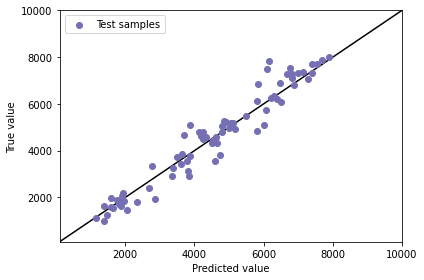

In [ ]:
#plt.scatter(train_predictions, train_y, label="Train samples", c='#d95f02')
plt.scatter(predict_test_y, test_y, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([100, 10000], [100, 10000], c='k', zorder=0)
plt.xlim([100, 10000])
plt.ylim([100, 10000])
plt.tight_layout()
plt.show()